# **Sea level rise**

**Content creators:** Aakash Sane, Karsten Haustein

**Content reviewers:** Brodie Pearson, Abigail Bodner, 

**Content editors:** Zane Mitrevica, Natalie Steinemann, Jenna Pearson, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Jenna Pearson, Chi Zhang, Ohad Zivan

**Our 2023 Sponsors:** NASA TOPS and Google DeepMind

In [3]:
# @title #**Project background**
# This will be a short video introducing the content creator(s) and motivating the research direction of the template.
# The Tech team will add code to format and display the video

# Title: Sea Level Rise

Sea level, commonly known as Mean Sea Level (MSL), is the position of the interface between the atmosphere and the ocean, and it exhibits continuous fluctuations attributable to a multiple of factors. It varies as per different timescales, such as hourly tides, daily to monthly perturbations caused by currents and storms, and alterations spanning several decades to centuries due to thermal expansion of seawater and the reduction of mass resulting from glaciers and ice sheets. Read more: [NOAA 2022 Sea level rise technical report](https://oceanservice.noaa.gov/hazards/sealevelrise/sealevelrise-tech-report.html).

**In this project**, you will work on sea level rise data from ECCO model (recall W1D2 tutorial 4 outputs) and tidal gauge datasets.

# **Project template**
![project questions](https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/projects/template-images/sea_level_rise_template_map.svg)

# **Data exploration notebook**
## **Project setup**



Please run the following cells!



In [13]:
# Imports

import random
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os
import pooch

# from google.colab import drive
# drive.mount('/content/drive')

## **ECCO: sea surface height**

In this project, you will analyse sea surface height data using the ECCO product which combines simulations and observations. ECCO stands for Estimating the Circulation and Climate of the Ocean and integrates observations with coupled ocean/sea-ice models. The netCDF data file contains sea surface height (SSH) stored as monthly means from the year 1992 to 2017 on a 0.5 x 0.5 degree grid. Using the ECCO product, global and regional sea level obtained due to physical effects (such as thermal expansion of sea water, etc.) can be estimated. Further details about the dataset can be obtained [here](https://ecco-group.org/).

The variable to use is called 'SSH' which stands for sea surface height. It is a three dimensional variable and is gridded on three axes: time, latitude, and longitude. Code cells below show how to load the dataset and give plotting examples. There is an example which plots the time-series at a particular latitude and longitude and another example which plots a colormap on the global grid. Those examples should equip you to tackle questions on the template, so go ahead and explore! 

Further resources about the dataset:

- ECCO Consortium, Fukumori, I., Wang, O., Fenty, I., Forget, G., Heimbach, P., & Ponte, R. M. (DATE ACCESSED). ECCO Central Estimate (Version 4 Release 4). Retrieved from https://podaac.jpl.nasa.gov/dataset/ECCO_L4_GMSL_TIME_SERIES_MONTHLY_V4R4.

- ECCO Consortium, Fukumori, I., Wang, O., Fenty, I., Forget, G., Heimbach, P., & Ponte, R. M. (2021, February 10). Synopsis of the ECCO Central Production Global Ocean and Sea-Ice State Estimate (Version 4 Release 4). https://doi.org/10.5281/zenodo.4533349

- Forget, G., J.-M. Campin, P. Heimbach, C. N. Hill, R. M. Ponte, and C. Wunsch, 2015: ECCO version 4: An integrated framework for non-linear inverse modeling and global ocean state estimation. Geoscientific Model Development, 8. https://www.geosci-model-dev.net/8/3071/2015/


In [19]:
# Data source-specific imports

# Data source:   https://pangeo-forge.org/dashboard/feedstock/7
## CMIP6.CMIP.CCCma.CanESM5.historical.r1i1p1f1.Omon.zos.gn.v20190429.zarr
url_ECCO = "~/shared/Data/Projects/Sea_Level/SEA_SURFACE_HEIGHT_mon_mean_1992-01-2017-12_ECCO_V4r4_latlon_0p50deg.nc"
ds = xr.open_dataset(url_ECCO)
ds

<xarray.Dataset>
Dimensions:         (time: 312, latitude: 360, longitude: 720, nv: 2)
Coordinates:
  * time            (time) datetime64[ns] 1992-01-16T18:00:00 ... 2017-12-16T...
  * latitude        (latitude) float32 -89.75 -89.25 -88.75 ... 89.25 89.75
  * longitude       (longitude) float32 -179.8 -179.2 -178.8 ... 179.2 179.8
    time_bnds       (time, nv) datetime64[ns] ...
    latitude_bnds   (latitude, nv) float32 ...
    longitude_bnds  (longitude, nv) float32 ...
Dimensions without coordinates: nv
Data variables:
    SSH             (time, latitude, longitude) float32 ...
    SSHIBC          (time, latitude, longitude) float32 ...
    SSHNOIBC        (time, latitude, longitude) float32 ...
Attributes: (12/57)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on a regular lat-lon grid. ...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1M
    time_coverage_end:            1992-02-01T00:00:00
    time_coverage_resolution:     P1M
    time_coverage_start:          1992-01-01T12:00:00
    title:                        ECCO Sea Surface Height - Monthly Mean 0.5 ...
    uuid:                         0910522c-4158-11eb-b85b-0cc47a3f5153

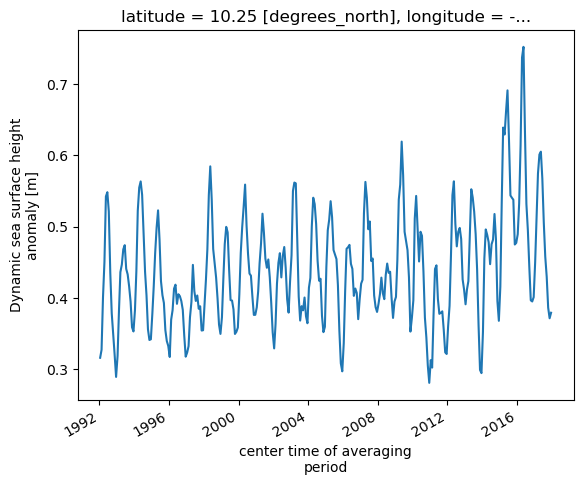

In [21]:
ds["SSH"][:, 200, 134].plot()

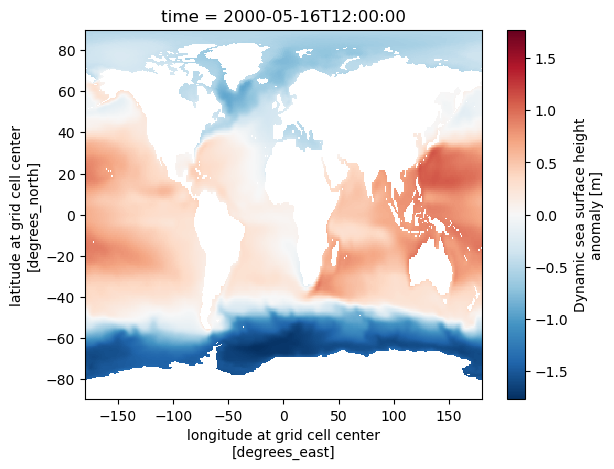

In [22]:
ds["SSH"][100, :, :].plot.pcolormesh()

## **Observations dataset: tidal gauges**

Students can download any tidal gauge data of their choice from this **[website](https://uhslc.soest.hawaii.edu/data/)**

It is recommended to download the NetCDF **'daily'** data for a particular location and it can be compared to the nearest latitude-longitude from the ECCO dataset. When you try to download the tidal gauge data, you can select a location, right click on the NetCDF of the data you want, copy link address and paste as the url below.

The file will have the sea level stored as a variable called **'sea_level'** and is a single variable as a function of time. It can be fun to see how close the tidal gauge data agree (or disagree) with the ECCO data!

In [28]:
# Students can download any tidal gauge data of their choice from this website:
# https://uhslc.soest.hawaii.edu/data/
# instructions: select a location, right click on the netcdf of the data you want, copy link address and paste as the url below

In [29]:
# Data source-specific functions
url_choosen = "https://uhslc.soest.hawaii.edu/data/netcdf/fast/daily/d825.nc"  # this is the link for "Cuxhaven Germany", change to your location
# example code after downloading tidal gauge data:
ds = xr.open_dataset(
    pooch.retrieve(url_choosen, known_hash=None)
)  # this is just an example, tidal gauge NetCDF file needs to be downloaded in order to load this.
ds

<xarray.Dataset>
Dimensions:               (record_id: 1, time: 38443)
Coordinates:
  * time                  (time) datetime64[ns] 1917-12-30T12:00:00 ... 2023-...
  * record_id             (record_id) int16 8250
Data variables:
    sea_level             (record_id, time) float32 ...
    lat                   (record_id) float32 ...
    lon                   (record_id) float32 ...
    station_name          (record_id) |S8 ...
    station_country       (record_id) |S7 ...
    station_country_code  (record_id) float32 ...
    uhslc_id              (record_id) int16 ...
    gloss_id              (record_id) float32 ...
    ssc_id                (record_id) |S4 ...
    last_rq_date          (record_id) datetime64[ns] ...
Attributes:
    title:                  UHSLC Fast Delivery Tide Gauge Data (daily)
    ncei_template_version:  NCEI_NetCDF_TimeSeries_Orthogonal_Template_v2.0
    featureType:            timeSeries
    Conventions:            CF-1.6, ACDD-1.3
    date_created:           2023-06-25T14:26:19Z
    publisher_name:         University of Hawaii Sea Level Center (UHSLC)
    publisher_email:        philiprt@hawaii.edu, markm@soest.hawaii.edu
    publisher_url:          http://uhslc.soest.hawaii.edu
    summary:                The UHSLC assembles and distributes the Fast Deli...
    processing_level:       Fast Delivery (FD) data undergo a level 1 quality...
    acknowledgment:         The UHSLC Fast Delivery database is supported by ...

# **Further reading**

- 2022 Sea Level Rise Technical Report
https://oceanservice.noaa.gov/hazards/sealevelrise/sealevelrise-tech-report-sections.html

- Oppenheimer, M., B.C. Glavovic , J. Hinkel, R. van de Wal, A.K. Magnan, A. Abd-Elgawad, R. Cai, M. Cifuentes-Jara, R.M. DeConto, T. Ghosh, J. Hay, F. Isla, B. Marzeion, B. Meyssignac, and Z. Sebesvari, 2019: Sea Level Rise and Implications for Low-Lying Islands, Coasts and Communities. In: IPCC Special Report on the Ocean and Cryosphere in a Changing Climate [H.-O. Pörtner, D.C. Roberts, V. Masson-Delmotte, P. Zhai, M. Tignor, E. Poloczanska, K. Mintenbeck, A. Alegría, M. Nicolai, A. Okem, J. Petzold, B. Rama, N.M. Weyer (eds.)]. Cambridge University Press, Cambridge, UK and New York, NY, USA, pp. 321-445. https://doi.org/10.1017/9781009157964.006. 

- Domingues, R., Goni, G., Baringer, M., &Volkov, D. (2018). What caused theaccelerated sea level changes along theU.S. East Coast during 2010–2015?Geophysical Research Letters,45,13,367–13,376. https://doi.org/10.1029/2018GL081183Received 

- Church, J.A., P.U. Clark, A. Cazenave, J.M. Gregory, S. Jevrejeva, A. Levermann, M.A. Merrifield, G.A. Milne, R.S. Nerem, P.D. Nunn, A.J. Payne, W.T. Pfeffer, D. Stammer and A.S. Unnikrishnan, 2013: Sea Level Change. In: Climate Change 2013: The Physical Science Basis. Contribution of Working Group I to the Fifth Assessment Report of the Intergovernmental Panel on Climate Change 
[Stocker, T.F., D. Qin, G.-K. Plattner, M. Tignor, S.K. Allen, J. Boschung,
A. Nauels, Y. Xia, V. Bex and P.M. Midgley (eds.)]. Cambridge University Press, Cambridge, United Kingdom and New York, NY, USA. https://www.ipcc.ch/site/assets/uploads/2018/02/WG1AR5_Chapter13_FINAL.pdf 

- Gregory, J.M., Griffies, S.M., Hughes, C.W. et al. Concepts and Terminology for Sea Level: Mean, Variability and Change, Both Local and Global. Surv Geophys 40, 1251–1289 (2019). https://doi.org/10.1007/s10712-019-09525-z

- Wang, J., Church, J. A., Zhang, X., Gregory, J. M., Zanna, L., & Chen, X. (2021). Evaluation of the Local Sea‐Level Budget at Tide Gauges Since 1958. Geophysical Research Letters, 48(20), e2021GL094502.  https://doi.org/10.1029/2021GL094502 

- Cazenave, A. and Cozannet, G.L. (2014), Sea level rise and its coastal impacts. Earth's Future, 2: 15-34. https://doi-org.ezproxy.princeton.edu/10.1002/2013EF000188

- Mimura N. Sea-level rise caused by climate change and its implications for society. Proc Jpn Acad Ser B Phys Biol Sci. 2013;89(7):281-301. doi: 10.2183/pjab.89.281. PMID: 23883609; PMCID: PMC3758961. doi: [10.2183/pjab.89.281](https://www.jstage.jst.go.jp/article/pjab/89/7/89_PJA8907B-01/_article)

